# Import the right libraries needed

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Load the credit card dataset

In [ ]:
df_creditcard = pd.read_csv("/content/creditcard.csv")
df_creditcard

# Machine learning :

## Split the dataset

In [ ]:
X = df_creditcard.drop(columns='Class')
y = df_creditcard['Class']

In [ ]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=42)

In [ ]:
y_test.value_counts()

Class
0    56864
1       98
Name: count, dtype: int64

## Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter=1000)
#Train the model
model.fit(X_train , y_train)
#fit the model with the train set
model.score(X_train , y_train)
#predict the data test
y_pred = model.predict(X_test)
print(f'Logistic Regression Accuracy : {accuracy_score(y_pred,y_test):.6f}')

Logistic Regression Accuracy : 0.998894


In [ ]:
print(f"classification report:\n {classification_report(y_test, y_pred)}")

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.49      0.60        98

    accuracy                           1.00     56962
   macro avg       0.89      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962



Confusion Matrix :
 [[56851    13]
 [   50    48]]



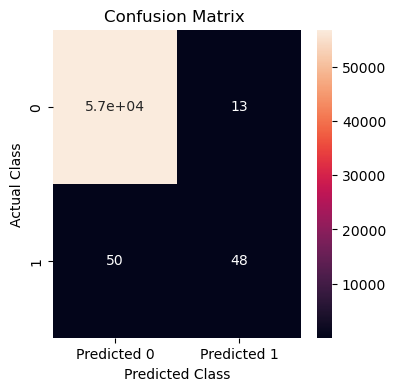

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix :\n {conf_matrix}\n")

plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True , xticklabels = ["Predicted 0", "Predicted 1"], yticklabels = ["0" , "1"] )
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title('Confusion Matrix ')
plt.show()

## ROC curve

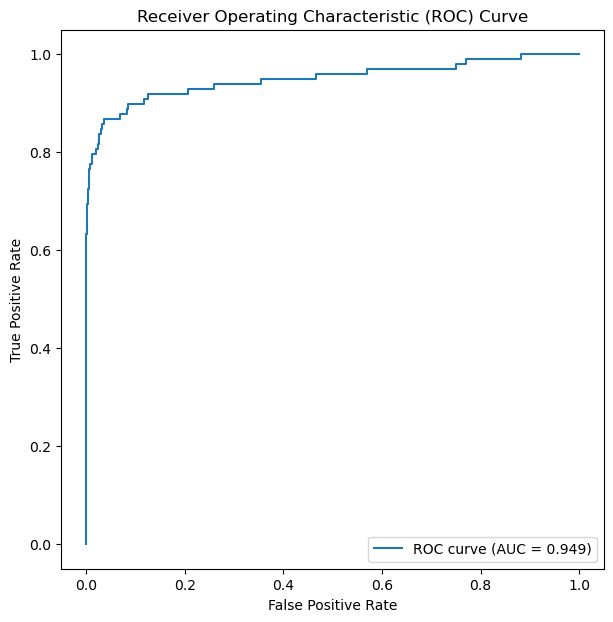

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train , y_train)
model.score(X_train , y_train)
y_pred = model.predict(X_test)

#Determinate the ROC curve:
y_prob = model.predict_proba(X_test)[:,1]
fpr,tpr, thresholds = roc_curve(y_test,y_prob)

#Calculate AUC : Area Under the Curve
roc_auc = auc(fpr,tpr)

#Plot the ROC curve
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,label= f'ROC curve (AUC = {round(roc_auc,3)})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Classifier model

In [ ]:
model = RandomForestClassifier(n_estimators=14, max_depth=11, bootstrap=True,random_state=100)
model.fit(X_train,y_train)
accuracy = model.score(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Random Forest Classifier Accuracy : {accuracy_score(y_pred,y_test) :.5f}')

Random Forest Classifier Accuracy : 0.99953


In [ ]:
print(f'Classification Report : \n {classification_report(y_test,y_pred)}')

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



confusion matrix : 
 [[56859     5]
 [   22    76]]



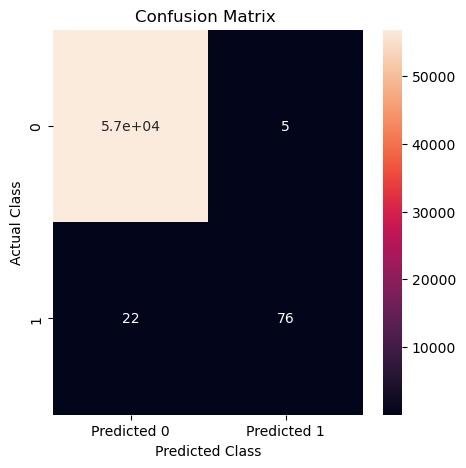

In [ ]:
conf_matrix = confusion_matrix(y_test , y_pred)
print(f"confusion matrix : \n {conf_matrix}\n")

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True , xticklabels = ["Predicted 0" , "Predicted 1"], yticklabels = ["0" , "1"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title('Confusion Matrix ')
plt.show()

## Support Vector Machine model

In [ ]:
#https://www.youtube.com/watch?v=tlotHVY1qZ4
model = SVC(kernel='linear', C=1.0)
model.fit(X_train,y_train)
score = model.score(X_train,y_train)
y_pred = model.predict(X_test)
print(f'Support Vector Machine Classifier Accuracy : {accuracy_score(y_pred,y_test) :.5f}')

Support Vector Machine Classifier Accuracy : 0.99846


In [ ]:
print(f'Classification Report : \n {classification_report(y_test,y_pred)}')

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.60      0.30      0.40        98

    accuracy                           1.00     56962
   macro avg       0.80      0.65      0.70     56962
weighted avg       1.00      1.00      1.00     56962



confusion matrix : 
 [[56845    19]
 [   69    29]]


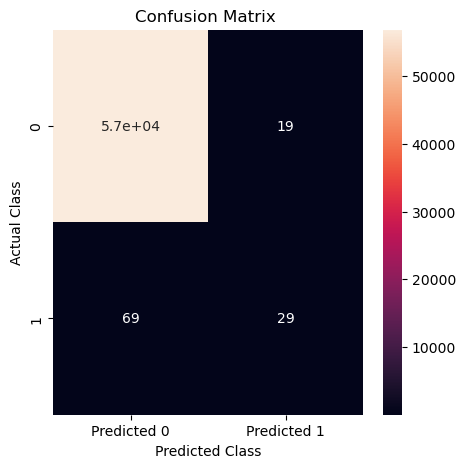

In [ ]:
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test , y_pred)
print(f"confusion matrix : \n {conf_matrix}")

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True , xticklabels = ["Predicted 0" , "Predicted 1"], yticklabels = ["0" , "1"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title('Confusion Matrix ')
plt.show()

## Gradient Boosting Classifier model

In [ ]:
model = GradientBoostingClassifier(max_depth=4, learning_rate=0.8)
model.fit(X_train,y_train)
model.score(X_train,y_train)
y_pred = model.predict(X_test)
print(f'Gradient Boosting Classifier Accuracy : {accuracy_score(y_pred,y_test) :.5f}')

In [ ]:
print(f'Classification Report : \n {classification_report(y_test,y_pred)}')

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



confusion matrix : 
 [[56843    21]
 [   39    59]]


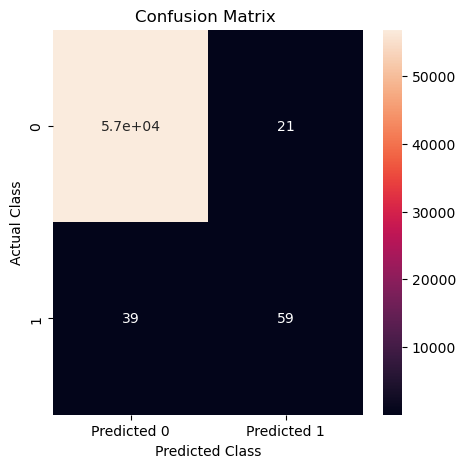

In [ ]:
conf_matrix = confusion_matrix(y_test , y_pred)
print(f"confusion matrix : \n {conf_matrix}")

plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True , xticklabels = ["Predicted 0" , "Predicted 1"], yticklabels = ["0" , "1"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title('Confusion Matrix ')
plt.show()